# Example 2.3: GD of a logistic regression neuron

In [1]:
# import libraries
import torch
import numpy as np
import matplotlib.pylab as plt

In [2]:
# set learning parameters
no_epochs = 500
lr = 0.04

SEED = 10
np.random.seed(SEED)

In [3]:
# training data
X = np.array([[1.33, 0.72], [-1.55, -0.01], [0.62, -0.72],
    [0.27, 0.11], [0.0, -0.17], [0.43, 1.2], [-0.97, 1.03], [0.23, 0.45]])
Y = np.array([0, 1, 1, 1, 1, 0, 0, 0]).reshape(8,1)

print('X: {}'.format(X))
print('Y: {}'.format(Y))

X: [[ 1.33  0.72]
 [-1.55 -0.01]
 [ 0.62 -0.72]
 [ 0.27  0.11]
 [ 0.   -0.17]
 [ 0.43  1.2 ]
 [-0.97  1.03]
 [ 0.23  0.45]]
Y: [[0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]]


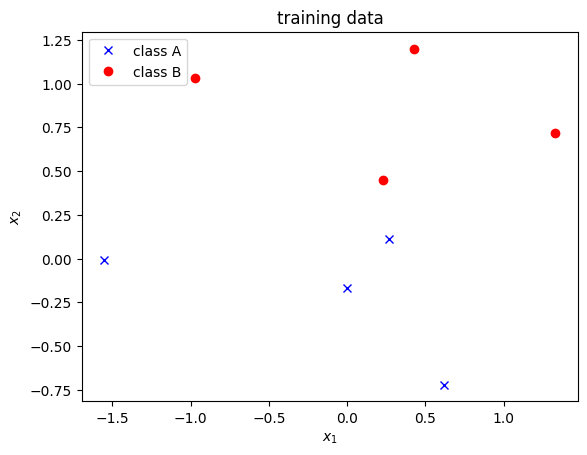

In [4]:
# plot training data
plt.figure(1)
plt.plot(X[Y[:,0]==1,0], X[Y[:,0]==1,1],'bx', label ='class A')
plt.plot(X[Y[:,0]==0,0], X[Y[:,0]==0,1],'ro', label='class B')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('training data')
plt.legend()
plt.show()

In [5]:
# create a logistic neuron class
class Logistic():
  def __init__(self):
    self.w = torch.tensor(np.random.rand(2,1))
    self.b = torch.tensor(0.)

  def __call__(self, x):
    u = torch.matmul(torch.tensor(x), self.w) + self.b
    logits = torch.sigmoid(u)
    
    return u, logits

In [6]:
# compute entropy and classification error
def loss(targets, logits): # logits = f_u

  entropy = -torch.sum(torch.tensor(targets)*torch.log(logits) + (1-torch.tensor(targets))*torch.log(1-logits))
  class_err = torch.sum(torch.not_equal(logits > 0.5, torch.tensor(targets)))

  return entropy, class_err

In [7]:
# Train the model
def train(model, inputs, targets, learning_rate):
  _, f_u = model(inputs)
  
  grad_u = -(torch.tensor(targets) - f_u)
  grad_w = torch.matmul(torch.transpose(torch.tensor(inputs),0,1), grad_u)
  grad_b = torch.sum(grad_u)
  
  model.w -= learning_rate * grad_w
  model.b -= learning_rate * grad_b

In [8]:
# create a logistic neuron object called model
model = Logistic()

print('w: {}, b: {}'.format(model.w.numpy(), model.b.numpy()))

w: [[0.77132064]
 [0.02075195]], b: 0.0


In [9]:
entropy, err = [], []

# gradient descent learning begins
for epoch in range(no_epochs):

  u_, f_u_ = model(X)
  entropy_, err_ = loss(Y, f_u_)
  
  train(model, X, Y, learning_rate=lr)
  
  # for first epoch, print values
  if (epoch == 0):
    print('u:{}'.format(u_.detach().numpy()))
    print('f_u:{}'.format(f_u_.detach().numpy()))
    print('y: %d'.format((f_u_ > 0.5).numpy().astype(int)))
    print('entropy:{}'.format(entropy_))
    print('error:{}'.format(err_))
    print('w: {}, b: {}'.format(model.w.numpy(), model.b.numpy()))

  if epoch%100 == 0:
      print('Epoch %2d:  entropy: %2.5f, error: %d'%(epoch, entropy_, err_))

  entropy.append(entropy_), err.append(err_)

u:[[ 1.04079786]
 [-1.19575452]
 [ 0.4632774 ]
 [ 0.21053929]
 [-0.00352783]
 [ 0.35657022]
 [-0.72680652]
 [ 0.18674213]]
f_u:[[0.73900392]
 [0.23223133]
 [0.61379138]
 [0.55244125]
 [0.49911804]
 [0.58820993]
 [0.32589591]
 [0.54655033]]
y: %d
entropy:6.652175570630012
error:5
w: [[ 0.69631487]
 [-0.06489691]], b: -0.003889683401212096
Epoch  0:  entropy: 6.65218, error: 5
Epoch 100:  entropy: 1.54471, error: 0
Epoch 200:  entropy: 1.07594, error: 0
Epoch 300:  entropy: 0.87412, error: 0
Epoch 400:  entropy: 0.75494, error: 0


In [10]:
# print learned weights and error
print('w: %s, b: %s'%(model.w.numpy(), model.b.numpy()))
print('entropy: %2.5f, error: %d'%(entropy[-1], err[-1]))

w: [[-1.12866641]
 [-6.65662595]], b: 2.090062
entropy: 0.67417, error: 0


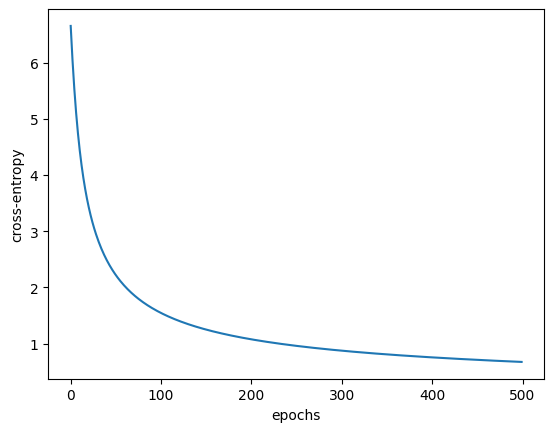

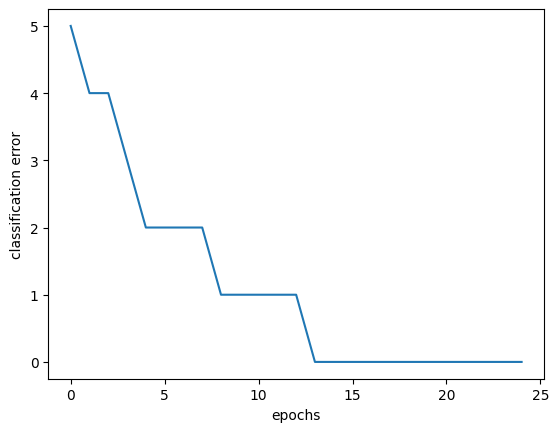

In [11]:
# plot learning curves
plt.figure(2)
plt.plot(range(no_epochs), entropy)
plt.xlabel('epochs')
plt.ylabel('cross-entropy')
plt.show()

plt.figure(3)
plt.plot(range(25), np.array(err)[:25])
plt.xlabel('epochs')
plt.ylabel('classification error')
plt.show()

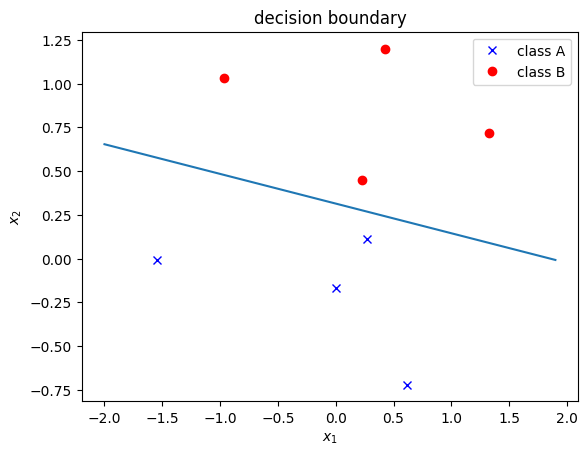

In [12]:
# plot the decision boundary
x1 = np.arange(-2, 2, 0.1)
x2 = -(x1*model.w.numpy()[0] + model.b.numpy())/model.w.numpy()[1]

plt.figure(4)
plt.plot(X[Y[:,0]==1,0], X[Y[:,0]==1,1],'bx', label ='class A')
plt.plot(X[Y[:,0]==0,0],X[Y[:,0]==0,1],'ro', label='class B')
plt.plot(x1, x2, '-')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('decision boundary')
plt.legend()
plt.show()